### Test_PLS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mbpls.data.get_data import load_FTIR_Data
from scipy.io import loadmat

In [3]:
# Upload the raman data
raman_data = pd.read_csv("./Data/prepa_raman_data.csv", sep = ',', decimal = '.', na_values ='NaN')
raman_data = raman_data.rename(columns={'Group.1':'Strain'})
raman_data

,Strain,X600,X601,X602,X603,X604,X605,X606,X607,X608,...,X1612,X1613,X1614,X1615,X1616,X1617,X1618,X1619,X1620,X1621
0,AMK,0.005259,0.005296,0.005315,0.005542,0.005840,0.006171,0.006269,0.005919,0.005488,...,0.014231,0.012647,0.011288,0.009718,0.007902,0.006070,0.004513,0.003410,0.000605,0.001054
1,AZM,0.006840,0.006824,0.006840,0.006983,0.007281,0.007867,0.008063,0.007401,0.006613,...,0.014516,0.012216,0.010650,0.009563,0.007857,0.006084,0.004479,0.003528,0.000739,0.001001
2,CFIX,0.009100,0.008903,0.009184,0.009542,0.009756,0.010177,0.010319,0.009574,0.008640,...,0.012331,0.010492,0.010190,0.008663,0.007005,0.005463,0.004089,0.003895,0.002260,0.002654
3,CP,0.008013,0.007944,0.007480,0.007366,0.008054,0.008955,0.008982,0.008253,0.007808,...,0.014886,0.014067,0.013045,0.011687,0.009937,0.007799,0.006600,0.005745,0.002461,0.002330
4,CPFX,0.010620,0.010711,0.010749,0.010607,0.010688,0.011532,0.012174,0.011604,0.010707,...,0.013826,0.012061,0.010094,0.009491,0.008382,0.006529,0.004964,0.003940,0.001934,0.001949
5,CPZ,0.006986,0.007075,0.006909,0.006665,0.006665,0.007290,0.007439,0.006640,0.006137,...,0.013590,0.012095,0.010938,0.010044,0.008698,0.007115,0.005234,0.003934,0.001022,0.001022
6,DOXY,0.007112,0.007595,0.007799,0.007763,0.007995,0.009068,0.009379,0.007883,0.007184,...,0.015197,0.013346,0.011674,0.010482,0.008917,0.007376,0.005607,0.004532,0.001942,0.002279
7,ENX,0.012209,0.012505,0.012112,0.011615,0.012167,0.013151,0.013239,0.012240,0.010875,...,0.014529,0.012708,0.009622,0.009410,0.008769,0.006076,0.004596,0.003763,0.003025,0.003206
8,MDS42,0.006704,0.006534,0.006542,0.006787,0.007263,0.007658,0.007573,0.007169,0.006745,...,0.014651,0.012975,0.011707,0.010298,0.008442,0.006646,0.005086,0.003817,0.000846,0.000847
9,NM,0.007440,0.007596,0.007948,0.008449,0.008910,0.009464,0.009153,0.008386,0.008298,...,0.011365,0.010148,0.008970,0.007324,0.006025,0.004747,0.003702,0.002716,0.001587,0.001376


In [4]:
x1 = raman_data #les données RAMAN
x1.Strain.replace(['AMK','AZM','CFIX','CP','CPFX','CPZ','DOXY','ENX','MDS42','NM','TP'],[1,2,3,4,5,6,7,8,9,10,11],inplace = True)
x1 = x1.set_index('Strain')
x1.index.name = None
print(x1)

        X600      X601      X602      X603      X604      X605      X606  \
1   0.005259  0.005296  0.005315  0.005542  0.005840  0.006171  0.006269   
2   0.006840  0.006824  0.006840  0.006983  0.007281  0.007867  0.008063   
3   0.009100  0.008903  0.009184  0.009542  0.009756  0.010177  0.010319   
4   0.008013  0.007944  0.007480  0.007366  0.008054  0.008955  0.008982   
5   0.010620  0.010711  0.010749  0.010607  0.010688  0.011532  0.012174   
6   0.006986  0.007075  0.006909  0.006665  0.006665  0.007290  0.007439   
7   0.007112  0.007595  0.007799  0.007763  0.007995  0.009068  0.009379   
8   0.012209  0.012505  0.012112  0.011615  0.012167  0.013151  0.013239   
9   0.006704  0.006534  0.006542  0.006787  0.007263  0.007658  0.007573   
10  0.007440  0.007596  0.007948  0.008449  0.008910  0.009464  0.009153   
11  0.006886  0.006664  0.006769  0.007014  0.007509  0.008240  0.008232   

        X607      X608      X609    ...        X1612     X1613     X1614  \
1   0.00591

In [5]:
wavenumbers = raman_data.columns
bacteria = np.array(x1.index)
print(bacteria)

[ 1  2  3  4  5  6  7  8  9 10 11]


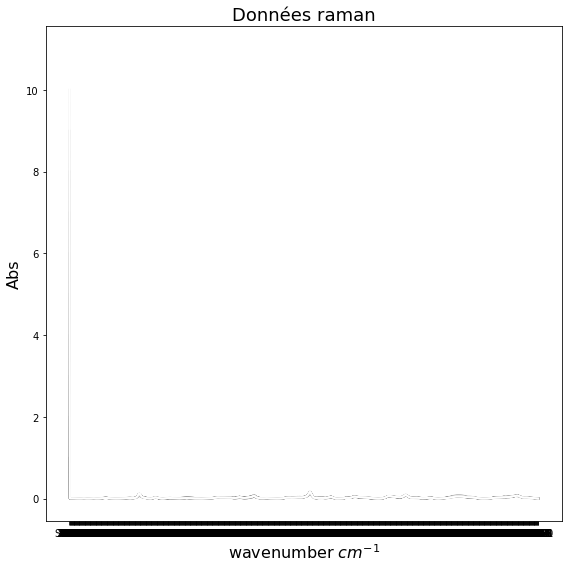

In [6]:
def plot_spectra(spectra, ax, name):
    bacteria_sample = np.array(spectra.index)
    color_code = (bacteria_sample - bacteria_sample.min())
    color_code = color_code / color_code.max()
    color_code = color_code[:]
    for spectrum, color in zip(np.array(spectra), color_code):
        ax.plot(wavenumbers, spectrum, color=(color, color, color), linewidth=2)
        ax.set_title(name, fontsize=18)
        ax.set_xlabel('wavenumber $cm^{-1}$', fontsize=16)
        ax.set_ylabel('Abs', fontsize=16)
        plt.tight_layout()

fig, ax = plt.subplots(figsize=(8, 8))
plot_spectra(raman_data, ax, 'Données raman')

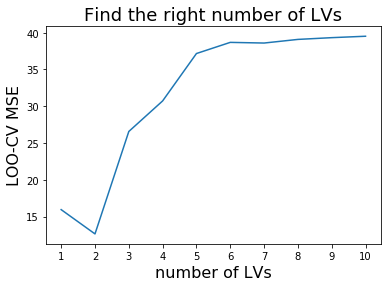

In [7]:
from mbpls.mbpls import MBPLS
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

MSEs = []
for lv in range(10):
    mbpls = MBPLS(n_components=lv+1)
    prediction = cross_val_predict(mbpls, raman_data, bacteria, cv=len(raman_data))
    prediction = pd.DataFrame(prediction)
    MSEs.append(mean_squared_error(prediction, bacteria))

plt.plot(np.arange(1,11), MSEs)
plt.xlabel('number of LVs', fontsize=16)
plt.xticks(np.arange(1,11), np.arange(1,11))
plt.ylabel('LOO-CV MSE', fontsize=16)
plt.title('Find the right number of LVs', fontsize=18);


            0   0
0    6.004998   1
1    4.376603   2
2    3.369781   3
3    7.794989   4
4    9.591560   5
5    4.208646   6
6    5.913936   7
7    3.466369   8
8    5.705819   9
9   11.238565  10
10   5.055693  11


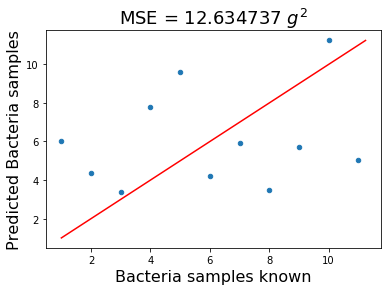

In [8]:
mbpls = MBPLS(n_components=2, method='NIPALS')
prediction = cross_val_predict(mbpls, raman_data, bacteria, cv=len(raman_data))
prediction = pd.DataFrame(prediction)
bacteria = pd.DataFrame(np.array(bacteria))
prediction = pd.concat((prediction, bacteria), axis=1)

print(prediction)

prediction.columns=['Predicted Bacteria samples', 'Bacteria samples known']
prediction.plot.scatter(x='Bacteria samples known', y='Predicted Bacteria samples')
plt.plot([prediction.min().min(), prediction.max().max()], 
         [prediction.min().min(), prediction.max().max()], color='red')
plt.ylabel(prediction.columns[0], fontsize=16)
plt.xlabel(prediction.columns[1], fontsize=16)
plt.title('MSE = {:.6f} $g^2$'.format(mean_squared_error(prediction['Bacteria samples known'], 
                                    prediction['Predicted Bacteria samples'])),fontsize=18);

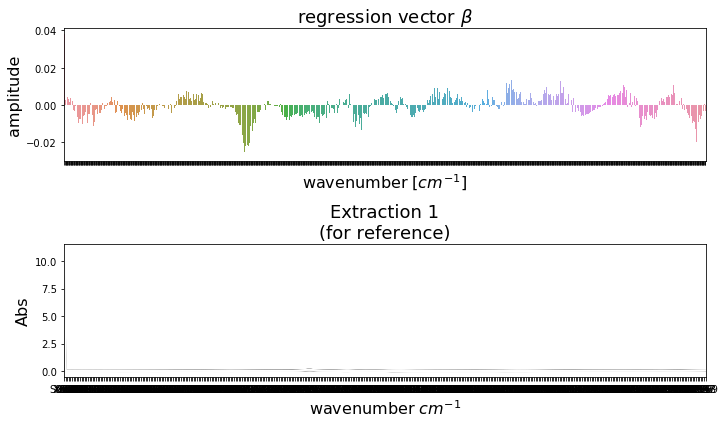

In [9]:
import seaborn as sns
mbpls = MBPLS(n_components=5)
mbpls.fit_transform(raman_data, bacteria)
fig, ax = plt.subplots(nrows=2, figsize=(10,6))
sns.barplot(x=raman_data.columns, y=mbpls.beta_[:,0], ax=ax[0])
ax[0].set_title('regression vector $\\beta$', fontsize=18)
ax[0].set_xlabel('wavenumber $[cm^{-1}]$', fontsize=16)
ax[0].set_ylabel('amplitude', fontsize=16)
ax[0].axes.xaxis.set_ticklabels([])
plot_spectra(raman_data, ax[1], 'Extraction 1\n(for reference)')
ax[1].set_xlim([wavenumbers.min(), wavenumbers.max()]);